# TALLER 2 DE PROGRAMACIÓN AVANZADA 

## Nombre: Brayan Andrés Ortiz González.
## ID: 360727

## "Programa para el análisis de ventas de un negocio a lo largo de un año."

### 1) Importamos las librerías requeridas para el programa. 

In [44]:
#Estas son las librerías necesarias para que el programa funcione.
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib.patheffects as path_effects  #Esta librería es para llamar al path de efectos para los gráficos.
from tabulate import tabulate                  #Esta librería permite imprimir los datos en una tabla.

### 2) Importamos los archivos "expenses.csv" y "sales.csv" para almacenar los datos en listas vacías para facilitar la manipulación de los mismos.

In [24]:
#En estas listas vacías se almacenan los datos de cada columna de los archivos csv.
Date = []
Sales = []
Expenses = []

#En esta sección se leen los archivos csv y con la ayuda del ciclo "for" agregamos los datos en las listas anteriores.
with open('expenses.csv') as expenses_csv:
    expenses_reader = csv.DictReader(expenses_csv, delimiter = ';')
    for row_1 in expenses_reader:
        Date.append(row_1['date'])
        Expenses.append(row_1['expenses'])

with open('sales.csv') as sales_csv:
    sales_reader = csv.DictReader(sales_csv, delimiter = ";")
    for row_2 in sales_reader:
        Sales.append(row_2['sales'])


### 3) Se hace la transformación de los datos correspondientes a "Sales" y "Expenses" en datos numéricos para poder operar con estos.

In [37]:
#Como los datos de los archivos csv son del tipo "String" se convierten en datos numéricos para poder realizar con ellos.
#Es decir, se transforman las columnas "Expenses" y "Sales" en datos numéricos.
#Para hacer eso se usa la función map() como iterador dónde los argumentos son la operación a realizar y la variable
#A la que se le aplicará dicha opreación, en este caso es una lista.

Str_To_Float_Expenses = list(map(float, Expenses))
Str_To_Float_Sales = list(map(float, Sales))
Int_Sales = []
Int_Expenses = []

#Para operar con mayor sencillez se transforman las listas con datos tipo flotante(Decimales) en datos tipo enteros. 
for Int in Str_To_Float_Sales:
    Int_Sales.append(int(Int))

for x in Str_To_Float_Expenses:
    Int_Expenses.append(int(x))

### 4) Obtenemos las ventas totales de cada mes del año.

In [38]:
#En esta sección del código se calculan las ventas totales de cada mes del año.
#Para ello, se emplea un ciclo "while" en dónde le estamos diciendo que compare la porción del string correspondiente
#A los meses del año. Sí las porciones del string de los meses son iguales, se suman todos los valores de la lista Int_Sales.
  
Sales_Per_Month = []

Last_Month = Date[0][-7:-5] #Esta variable toma la porción del string correspondiente a los meses en el formato de fechas.
                            #Ejemplo, Si tenemos la fecha 1/01/2021, la variable Last_Month va almacenar el string "01".                            

Sum_Sales = 0
Index = 0
while (Index < len(Date)):
    Current_Month = Date[Index][-7:-5]
    if(Last_Month == Current_Month):
        Sum_Sales += Int_Sales[Index]
    else:
        Sales_Per_Month.append([Last_Month, Sum_Sales])
        Sum_Sales = 0
        Index -= 1

    # El if y el +1 se encargan de revisar si estamos en el último elemento para guardar la última suma.   
    if(Index + 1 >= len(Date)):
        Sales_Per_Month.append([Current_Month, Sum_Sales])    

    Index += 1
    Last_Month = Current_Month

print(Sales_Per_Month) 

[['01', 27200500], ['02', 27012500], ['03', 30552600], ['04', 35129000], ['05', 28236000], ['06', 31368600], ['07', 34837700], ['08', 27727600], ['09', 30742400], ['10', 34526800], ['11', 30868900], ['12', 34062000]]


### 5) Obtenemos los gastos totales de cada mes del año.

In [39]:
#Para los gastos totales de cada mes del año se aplica la lógica implementada para calcular las ventas totales de cada mes del año.
Expenses_Per_Month = []

Last_Month = Date[0][-7:-5]

Sum_Expenses = 0
Index = 0
while (Index < len(Date)):
    Current_Month = Date[Index][-7:-5]
    if(Last_Month == Current_Month):
        Sum_Expenses += Int_Expenses[Index]
    else:
        Expenses_Per_Month.append([Last_Month, Sum_Expenses])
        Sum_Expenses = 0
        Index -= 1

      
    if(Index + 1 >= len(Date)):
        Expenses_Per_Month.append([Current_Month, Sum_Expenses])    

    Index += 1
    Last_Month = Current_Month

print(Expenses_Per_Month) 

[['01', 16245388], ['02', 12828273], ['03', 10564879], ['04', 12202464], ['05', 12613112], ['06', 12002297], ['07', 12709600], ['08', 13483899], ['09', 15385074], ['10', 16942889], ['11', 13495265], ['12', 13551400]]


### 6) Obtenemos las utilidades del negocio en cada mes del año.

In [40]:
#Para este calculo se hizo uso de la función zip para iterar en las dos listas anidadas "Sales_Per_Month" y "Expenses_Per_Month"
#El ciclo "for" se empleo para recorrer cada elemento de las sublistas.
#En base a esto, se realiza la resta de los datos de las sublistas que contienen las ventas y los gastos para guardarlos en 
#Una nueva lista llamada "Utility".
Utility = [[a[0], a[1] - b[1]] for a, b in zip(Sales_Per_Month, Expenses_Per_Month)]
print(Utility)

[['01', 10955112], ['02', 14184227], ['03', 19987721], ['04', 22926536], ['05', 15622888], ['06', 19366303], ['07', 22128100], ['08', 14243701], ['09', 15357326], ['10', 17583911], ['11', 17373635], ['12', 20510600]]


### 7) Graficamos los gastos del negocio mes a mes.

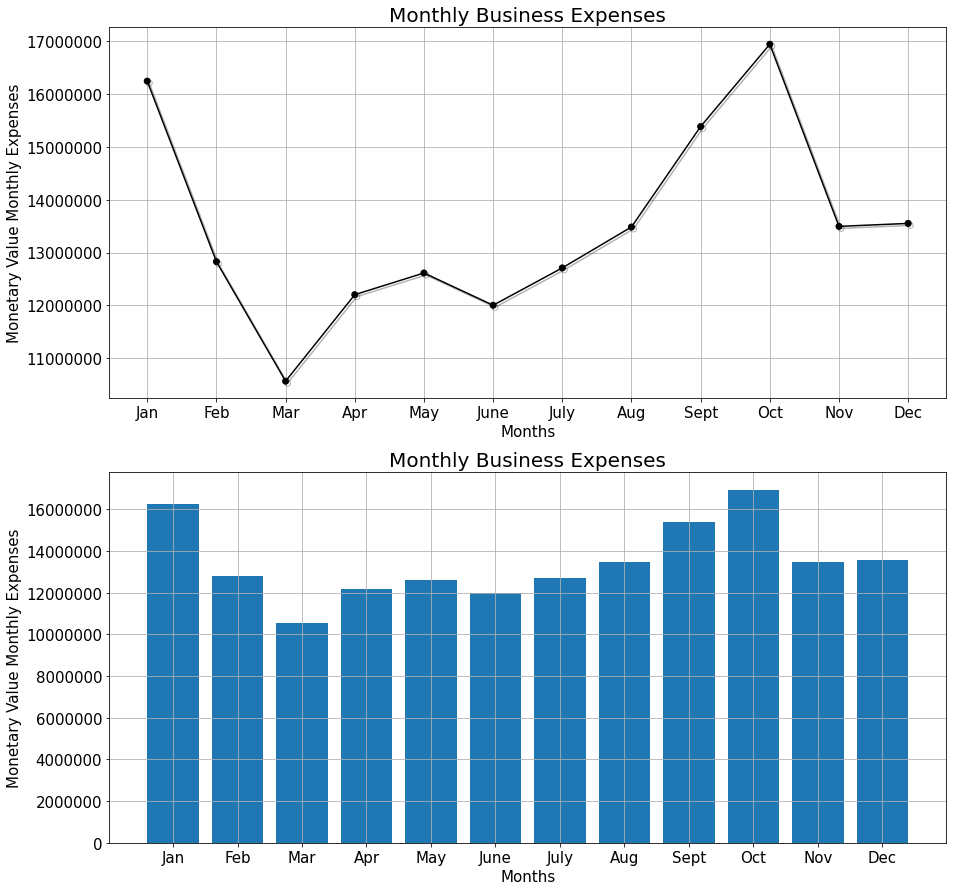

In [43]:
#En este apartado se creo una lista con los nombres de los meses para emplearla en la rotulación de los ejes.
#Las listas "Graph_data_x_expenses" y "Graph_data_y_expenses" contienen la información de los ejes de la gráfica de los gastos. 
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
N_Months = range(len(Months))
Graph_data_x_expenses, Graph_data_y_expenses = list(zip(*Expenses_Per_Month))
Graph_data_x_expenses_int = list(map(int, Graph_data_x_expenses))
plt.close('all')
plt.figure(figsize=(15,15))
ax = plt.subplot(2,1,1)
#Con la siguiente línea de código le asignamos un marcador, color y tambén le damos el efecto de sombra a la curva de la gráfica.
plt.plot(Graph_data_x_expenses, Graph_data_y_expenses, 'k', marker='o',  path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
#Estas líneas son para cambiar las etiquetas de los ejes y ponerle un título a la gráfica.
plt.title('Monthly Business Expenses', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Monetary Value Monthly Expenses', fontsize=15)
plt.grid()
#En la siguiente línea lo que estamos haciendo es cambiandóle el formato a los valores en el eje "Y" para que no los represente
#Con exponentes base 10 y la opción que se encarga de eso es "useOffset=False".
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
ax.set_xticks(N_Months)
ax.set_xticklabels(Months, fontsize=15)
plt.yticks(fontsize=15)
#Las siguientes líneas se usaron para implementar una gráfica del tipo histograma y también se le ponen sus respectivas etiquetas
#Así como también, los rotúlos de los ejes y el formato del eje "y"
ax_1 = plt.subplot(2,1,2)
ax_1.set_xticks(N_Months)
ax_1.set_xticklabels(Months, fontsize=15)
height = Graph_data_y_expenses
plt.bar(N_Months, height, width=0.8, bottom=None, align='center', data=None)
plt.title('Monthly Business Expenses', fontsize=20)
plt.xlabel('Months', fontsize= 15)
plt.ylabel('Monetary Value Monthly Expenses', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.yticks(fontsize=15)
plt.grid()
plt.show()
#plt.savefig('Monthly Business Expenses.jpg') #Con esta línea guardamos la figura en un archivo de extensión .jpg
#Esta misma lógica se implementó para las gráficas de los gastos y de las utilidades. Lo único que varía en las otras
#Gráficas son los nombres de las listas que contienen la información de los ejes.

### 8) Graficamos las ventas del negocio mes a mes.

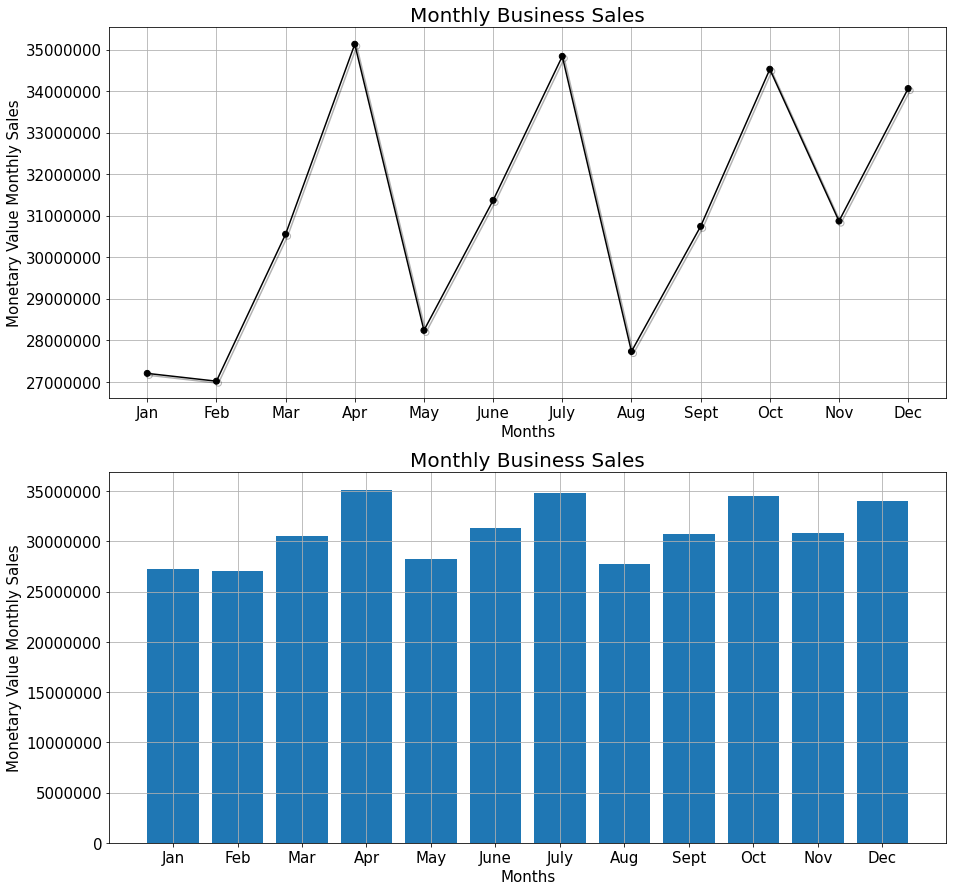

In [30]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
N_Months = range(len(Months))
Graph_data_x_sales, Graph_data_y_sales = list(zip(*Sales_Per_Month)) #Listas con la información de los ejes.
Graph_data_x_sales_int = list(map(int, Graph_data_x_sales))
plt.close('all')
plt.figure(figsize=(15,15))
ax = plt.subplot(2,1,1)
plt.plot(Graph_data_x_sales, Graph_data_y_sales, 'k', marker='o',  path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.title('Monthly Business Sales', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Monetary Value Monthly Sales', fontsize=15)
plt.grid()
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
ax.set_xticks(N_Months)
ax.set_xticklabels(Months, fontsize=15)
plt.yticks(fontsize=15)

ax_1 = plt.subplot(2,1,2)
ax_1.set_xticks(N_Months)
ax_1.set_xticklabels(Months, fontsize=15)
height = Graph_data_y_sales
plt.bar(N_Months, height, width=0.8, bottom=None, align='center', data=None)
plt.title('Monthly Business Sales', fontsize=20)
plt.xlabel('Months', fontsize= 15)
plt.ylabel('Monetary Value Monthly Sales', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.yticks(fontsize=15)
plt.grid()
#plt.show()
plt.savefig('Monthly Business Sales.jpg')

### 9) Graficamos las utilidades del negocio de cada mes.

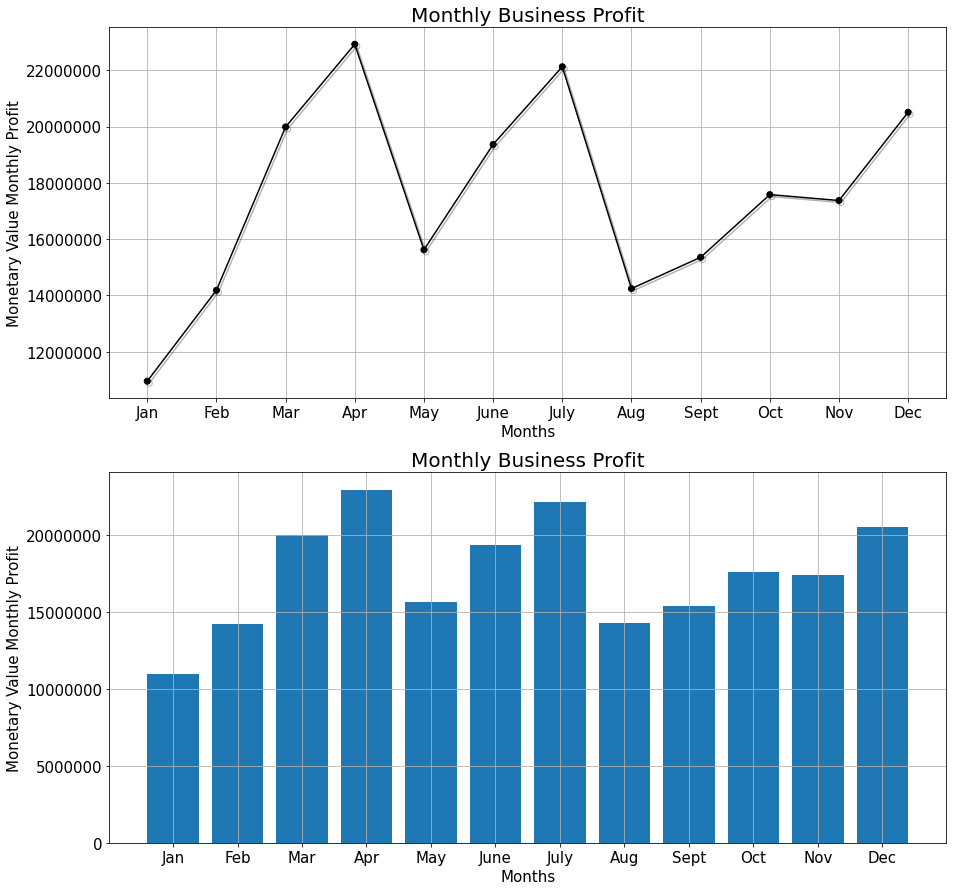

In [31]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
N_Months = range(len(Months))
Graph_data_x, Graph_data_y = list(zip(*Utility)) #Listas con la información de los ejes.
Graph_data_x_int = list(map(int, Graph_data_x))
plt.close('all')
plt.figure(figsize=(15,15))
ax = plt.subplot(2,1,1)
plt.plot(Graph_data_x, Graph_data_y, 'k', marker='o',  path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.title('Monthly Business Profit', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Monetary Value Monthly Profit', fontsize=15)
plt.grid()
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
ax.set_xticks(N_Months)
ax.set_xticklabels(Months, fontsize=15)
plt.yticks(fontsize=15)

ax_1 = plt.subplot(2,1,2)
ax_1.set_xticks(N_Months)
ax_1.set_xticklabels(Months, fontsize=15)
height = Graph_data_y
plt.bar(N_Months, height, width=0.8, bottom=None, align='center', data=None)
plt.title('Monthly Business Profit', fontsize=20)
plt.xlabel('Months', fontsize= 15)
plt.ylabel('Monetary Value Monthly Profit', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.yticks(fontsize=15)
plt.grid()
plt.show()
#plt.savefig('Monthly Business Profit.jpg')

### 10) En este punto procedemos a realizar el análisis del comportamiento del negocio.

In [46]:
# Crecimiento de ventas mes a mes

#En esta sección se usó la función zip(*) para almacenar en listas independientes los datos de las fechas en la lista 
#"Dates_Sales" y los datos numéricos de las ventas en "Data_Sales"

Dates_Sales, Data_Sales = list(zip(*Sales_Per_Month))

#La ecuación para ver el crecimiento de ventas mes a mes en la  siguiente:
#Crecimiento_Ventas = ((Ventas Totales Mes Actual/Ventas totales Mes Anterior)-1)*100
#Ya con esto claro se usa el ciclo "for" para aplicar esta fórmula en cada iteración a cada elemento de Data_Sales.
#A su vez se va almacenando en la lista Sales_Percentage.
Sales_Percentage = []

for k in range(1, len(Data_Sales)):
    Comparison_Sales = ((Data_Sales[k] / Data_Sales[k-1])-1)*100
    Sales_Percentage.append(Comparison_Sales)
    
Int_Sales_Percentage = []
for v in Sales_Percentage:
    Int_Sales_Percentage.append(int(v))

#Se crea un diccionario para facilitar la representación(Impresión) de los datos en forma de tabla.
SG_Table = {'Month-To-Month Comparison': ['Feb vs Jan', 'Mar vs Feb', 'Apr vs Mar', 'May vs Apr',\
                                    'June vs May', 'July vs June', 'Aug vs July', 'Sept vs Aug',\
                                    'Oct vs Sept', 'Nov vs Oct', 'Dec vs Nov'], 'Percentage %': Int_Sales_Percentage}
#En la siguiente línea, haciendo uso de "tabulate" representamos los datos en forma de tabla, dónde "headers" corresponde
#A las llaves(Keys) del dicionario anterior y estos figuran como los títulos de cada columna de la tabla.
print(tabulate(SG_Table, headers='keys', tablefmt='fancy_grid'))

# Porcentaje de gastos mes a mes

#Con la función zip(*) almacenamos en listas independientes los datos de las fechas en la lista 
#"Dates_Expenses" y los datos numéricos de los gasto en "Data_Expenses"

Dates_Expenses, Data_Expenses = list(zip(*Expenses_Per_Month))

#Para el porcentaje de gastos se aplica la siguiente ecuación:
#Porcentaje_Gastos_Mes = (Gastos Totales Mes Actual/Ventas Totales Mes Actual)*100
#Con la implementación del ciclo "for" aplicamos esta ecuación en cada dato de las listas 
#Con los valores de las ventas y gastos totales por mes y se almacena el resultado en la lista Expenses_Percentage.

Expenses_Percentage = []
for l in range(0, len(Data_Expenses)):
    Comparison_Expenses = ((Data_Expenses[l] / Data_Sales[l]))*100
    Expenses_Percentage.append(Comparison_Expenses)

Int_Expenses_Percentage = []
for b in Expenses_Percentage:
    Int_Expenses_Percentage.append(int(b))
    
#Código para imprimir el dicionario en formato de tabla.     
EG_Table = {'Months': Months, 'Percentage %': Int_Expenses_Percentage}
print(tabulate(EG_Table, headers='keys', tablefmt='fancy_grid'))


╒═════════════════════════════╤════════════════╕
│ Month-To-Month Comparison   │   Percentage % │
╞═════════════════════════════╪════════════════╡
│ Feb vs Jan                  │              0 │
├─────────────────────────────┼────────────────┤
│ Mar vs Feb                  │             13 │
├─────────────────────────────┼────────────────┤
│ Apr vs Mar                  │             14 │
├─────────────────────────────┼────────────────┤
│ May vs Apr                  │            -19 │
├─────────────────────────────┼────────────────┤
│ June vs May                 │             11 │
├─────────────────────────────┼────────────────┤
│ July vs June                │             11 │
├─────────────────────────────┼────────────────┤
│ Aug vs July                 │            -20 │
├─────────────────────────────┼────────────────┤
│ Sept vs Aug                 │             10 │
├─────────────────────────────┼────────────────┤
│ Oct vs Sept                 │             12 │
├───────────────────

### 11) En esta sección se calcula las ventas, gastos y utilidades totales en el año. Así como también el promedio y desviación de gastos, ventas y utilidades mensuales.

In [48]:
# Ventas totales en el año.
#Para obtener las ventas, gastos y utilidades totales basta con usar la función sum() para que sumen todos los datos contenidos
#En las listas "Data_Sales", "Data_Expenses" y "Graph_data_y" y el resultado se almacena en las variables "Total_Sales"
#"Total_Expenses" y "Total_Utilities" respectivamente.

#Nota: LA LISTA "Graph_data_y" CONTIENE LA INFORMACIÓN DE LAS UTILIDADES MENSUALES.

Total_Sales = sum(Data_Sales)

# Gastos totales en el año.

Total_Expenses = sum(Data_Expenses)

# Utilidades totales en el año.

Total_Utilities = sum(Graph_data_y)

#Código para imprimir el siguiente diccionario en formato de tabla.
T_Table = {'Total Results': ['Total Sales', 'Total Expenses', 'Total Utilities'],\
           'Values $': [Total_Sales, Total_Expenses, Total_Utilities]}

print(tabulate(T_Table, headers='keys', tablefmt='fancy_grid'))

# Promedio ventas mensuales.

# Los promedios de las ventas, los gastos y utilidades fueron calculados con la función numpy.mean()
#Los argumentos son los nombres de las listas con los valores.
#"Data_Sales", "Data_Expenses" y "Graph_Data_y" y se almacenan en las siguientes variables: 
#"Average_Sales", "Average_Expenses" y "Average_Utilities"
#Nota: Los promedios también se pueden calcular con numpy.average() pero yo usé la mencionada anteriormente.(numpy.mean())

Average_Sales = np.mean(Data_Sales)
Average_Monthly_Sales = int(Average_Sales)

# Promedio gastos mensuales.

Average_Expenses = np.mean(Data_Expenses)
Average_Monthly_Expenses = int(Average_Expenses)

# Promedio utilidades mensuales.

Average_Utilities = np.mean(Graph_data_y)
Average_Monthly_Utilities = int(Average_Utilities)

#Código para imprimir el siguiente diccionario en formato de tabla.
A_Table = {'Averages': ['Average Monthly Sales', 'Average Monthly Expenses', 'Average Monthly Utilities'],\
           'Values': [Average_Monthly_Sales, Average_Monthly_Expenses, Average_Monthly_Utilities]}

print(tabulate(A_Table, headers='keys', tablefmt='fancy_grid'))

# Desviación ventas mensuales.

#Para calcular la desviación estándar de las ventas, gastos y de las utilidades se usó la función numpy.std().
#Los argumentos de esa función son las listas en dónde se encuentran los datos de las ventas, gastos y utilidades por mes.
#El resultado se almacena en las variables: "S_Deviation_Sales", "S_Deviation_Expenses", "S_Deviation_Utilities".

S_Deviation_Sales = np.std(Data_Sales)

# Desviación gastos mensuales.

S_Deviation_Expenses = np.std(Data_Expenses)

# Desviación utilidades mensuales.

S_Deviation_Utilities = np.std(Graph_data_y)

#Código para imprimir el siguiente diccionario en formato de tabla.
S_Table = {'Standard Deviations': ['Deviation Sales', 'Deviation Expenses', 'Deviation Utilities'],\
           'Values': [S_Deviation_Sales, S_Deviation_Expenses, S_Deviation_Utilities]}

print(tabulate(S_Table, headers='keys', tablefmt='fancy_grid'))

╒═════════════════╤════════════╕
│ Total Results   │   Values $ │
╞═════════════════╪════════════╡
│ Total Sales     │  372264600 │
├─────────────────┼────────────┤
│ Total Expenses  │  162024540 │
├─────────────────┼────────────┤
│ Total Utilities │  210240060 │
╘═════════════════╧════════════╛
╒═══════════════════════════╤══════════╕
│ Averages                  │   Values │
╞═══════════════════════════╪══════════╡
│ Average Monthly Sales     │ 31022050 │
├───────────────────────────┼──────────┤
│ Average Monthly Expenses  │ 13502045 │
├───────────────────────────┼──────────┤
│ Average Monthly Utilities │ 17520005 │
╘═══════════════════════════╧══════════╛
╒═══════════════════════╤═════════════╕
│ Standard Deviations   │      Values │
╞═══════════════════════╪═════════════╡
│ Deviation Sales       │ 2.92531e+06 │
├───────────────────────┼─────────────┤
│ Deviation Expenses    │ 1.76426e+06 │
├───────────────────────┼─────────────┤
│ Deviation Utilities   │ 3.442e+06   │
╘═════════════

### 12) Creamos el archivo de texto (.txt) para escribir el análisis del comportamiento del negocio en el año.

In [49]:
#En esta sección se encuentra el contenido del archivo txt.

Title = '"Analysis Result"\n'

Text_Intro = '\nIn this file we can find the results from the analysis \
of the business performance in the year.\
The criteria taken into account for this were: Percentage of sales growth month by month, \
percentage of expenses month by month. The average and deviation of monthly sales, \
expenses and profits were also taken into account.\n'

Title_Table = '\n"Month-over-Month Sales Growth"\n'
Title_Comparison = '\nMonth To Month Comparison \tPercentage %\n'
Comparison_1 =     '       Feb vs Jan         \t  -0.69%\n'
Comparison_2 =     '       Mar vs Feb         \t   13%\n'
Comparison_3 =     '       Apr vs Mar         \t   14%\n'
Comparison_4 =     '       May vs Apr         \t  -19%\n'
Comparison_5 =     '       June vs May        \t   11%\n'
Comparison_6 =     '       July vs June       \t   11%\n'
Comparison_7 =     '       Aug vs July        \t  -20%\n'
Comparison_8 =     '       Sept vs Aug        \t   10%\n'
Comparison_9 =     '       Oct vs Sept        \t   12%\n'
Comparison_10 =    '       Nov vs Oct         \t  -10%\n'
Comparison_11 =    '       Dec vs Nov         \t   10%\n'

Title_Table1 = '\n"Percentage of month-to-month expenses"\n'
Title_Table_H = '\nMonths   \t  Percentage %\n'
M_1 =           '   Jan   \t     59%\n'
M_2 =           '   Feb   \t     47%\n'
M_3 =           '   Mar   \t     34%\n'
M_4 =           '   Apr   \t     34%\n'
M_5 =           '   May   \t     44%\n'
M_6 =           '   June  \t     38%\n'
M_7 =           '   July  \t     36%\n'
M_8 =           '   Aug   \t     48%\n'
M_9 =           '   Sept  \t     50%\n'
M_10 =          '   Oct   \t     49%\n'
M_11 =          '   Nov   \t     43%\n'
M_12 =          '   Dec   \t     39%\n'

Title_Table2 = '\n"Total Results"\n'
Title_Table_H1 = '\n Total Results          \t     Values\n'
Total_S =     '  Total Sales           \t   372264600\n'
Total_E =     'Total Expenses          \t   162024540\n'
Total_U =     'Total Utilities         \t   210240060\n'

Title_Table3 = '\n"Averages"\n'
Title_Table_H2 = '\n      Averages              \t  Values\n'
Average_MS =     'Average Monthly Sales       \t 31022050\n'
Average_ME =     'Average Monthly Expenses    \t 13502045\n'
Average_MU =     'Average Monthly Utilities   \t 17520005\n'

Title_Table4 = '\n"Standard Deviations"\n'
Title_Table_H3 = '\n Standard Deviations        \t    Values\n'
Deviation_S =    '   Deviation Sales          \t    2925310\n'
Deviation_E =    ' Deviation Expenses         \t    1764260\n'
Deviation_U =    ' Deviation Utilities        \t    3442000\n'

Text_1 = '\nBased on the information provided by the images and the tables above, we can conclude that:\n'
Text_2 = 'The months with the highest sales are the months that were above average sales. And they are the following:\n'

Title_Table_H4 = '\n Months With The Highest Sales   \t   Values\n'
MHS_1 =           '\n            April                \t   35129000\n' 
MHS_2 =           '\n            June                 \t   31368600\n'
MHS_3 =           '\n            July                 \t   34837700\n'
MHS_4 =           '\n           October               \t   34526800\n'
MHS_5 =           '\n           December              \t   34062000\n'

Text_3 = '\nThe months with the lowest sales are those that were below average. These are:\n'

Title_Table_H5 = '\n Months With Lower Sales    \t     Values\n'
MLS_1 =           '\n       January              \t    27200500\n'
MLS_2 =           '\n       February             \t    27012500\n'
MLS_3 =           '\n        March               \t    30552600\n'
MLS_4 =           '\n         May                \t    28236000\n'
MLS_5 =           '\n        August              \t    27727600\n'
MLS_6 =           '\n       September            \t    30742400\n'
MLS_7 =           '\n       November             \t    30868900\n'

Text_4 = '\nAnother important aspect is that it can be seen in \
the sales growth table that there are abrupt percentage drops \
in some months compared to the sales of the previous month, \
which indicates that in those months the strategies \
used to sell are not very efficient.'

Text_5 = '\nFor the expenses part, in order to define which are the months with higher or lower expenses, \
not only the average expenses must be taken into account, but also other factors such as the following \
must be considered: The type of business and the area of activity. Each business and its area has its \
own characteristics to define operating expenses. It is also necessary to know what percentage of \
expenses is acceptable to the business owner. Now, if we base ourselves only on the graph and the \
average expenses, the months with the lowest and highest expenses are the following:\n'

Title_Table_H6 = '\n Months With Lower Expenses     \t     Values\n'
MLE_1 =           '\n         February               \t    27200500\n'
MLE_2 =           '\n          March                 \t    27012500\n'
MLE_3 =           '\n          April                 \t    30552600\n'
MLE_4 =           '\n           May                  \t    28236000\n'
MLE_5 =           '\n          June                  \t    27727600\n'
MLE_6 =           '\n          July                  \t    30742400\n'
MLE_7 =           '\n          August                \t    30868900\n' 
MLE_8 =           '\n         November               \t    30868900\n'

Title_Table_H7 = '\n Months With Higher Expenses         \t  Values\n'
MHE_1 =           '\n         January                     \t 16245388\n'
MHE_2 =           '\n        September                    \t 15385074\n'
MHE_3 =           '\n         October                     \t 16942889\n'
MHE_4 =           '\n         December                    \t 13551400\n'

Text_6 = '\nFor the months with lower and higher utilities we \
made focus on comparing the months that are above or below the average utility value.\n'

Title_Table_H8 = '\n Months With Lower Utilities    \t     Values\n'
MLU_1 =          '\n         January                \t    10955112\n' 
MLU_2 =          '\n         February               \t    14184227\n'
MLU_3 =          '\n           May                  \t    15622888\n'
MLU_4 =          '\n          August                \t    14243701\n'
MLU_5 =          '\n         September              \t    15357326\n'
MLU_6 =          '\n         November               \t    17373635\n'

Title_Table_H9 = '\n Months With Higher Utilities   \t     Values\n'
MHU_1 =          '\n           March                \t    19987721\n'
MHU_2 =          '\n           April                \t    22926536\n'
MHU_3 =          '\n           June                 \t    19366303\n'
MHU_4 =          '\n           July                 \t    22128100\n'
MHU_5 =          '\n          October               \t    17583911\n'
MHU_6 =          '\n          December              \t    10955112\n'

Text_7 = '\nOn the other hand, the values found in the standard deviation \
table show that the data is not very scattered, so this translates into a \
profitable business that is not volatile. However, it is possible to improve \
business performance if the owner decides to plan new strategies to increase \
sales and optimize business expenses.\n'

Text_8 = '\nAuthor: Brayan Andres Ortiz Gonzalez.'
Text_9 = '\nDate created: 06/09/2022'

#Para la representación de la información de forma organizada estilo tabla, cree las siguientes variables.
Table_Comparison =  Title_Comparison + Comparison_1 + Comparison_2 + Comparison_3 + Comparison_4\
+ Comparison_5 + Comparison_6 + Comparison_7 + Comparison_8 + Comparison_9 + Comparison_10 + Comparison_11
Table_1 = Title_Table_H + M_1 + M_2 + M_3 + M_4 + M_5 + M_6 + M_7 + M_8 + M_9 + M_10 + M_11 + M_12
Table_2 = Title_Table_H1 + Total_S + Total_E + Total_U
Table_3 = Title_Table_H2 + Average_MS + Average_ME + Average_MU
Table_4 = Title_Table_H3 + Deviation_S + Deviation_E + Deviation_U
Table_5 = Title_Table_H4 + MHS_1 + MHS_2 + MHS_3 + MHS_4
Table_6 = Title_Table_H5 + MLS_1 + MLS_2 + MLS_3 + MLS_4 + MLS_5 + MLS_6 + MLS_7
Table_7 = Title_Table_H6 + MLE_1 + MLE_2 + MLE_3 + MLE_4 + MLE_5 + MLE_6 + MLE_7 + MLE_8
Table_8 = Title_Table_H7 + MHE_1 + MHE_2 + MHE_3 + MHE_4
Table_9 = Title_Table_H8 + MLU_1 + MLU_2 + MLU_3 + MLU_4 + MLU_5 + MLU_6
Table_10 = Title_Table_H9 + MHU_1 + MHU_2 + MHU_3 + MHU_4 + MHU_5 + MHU_6

#El contenido del archivo txt, está conformado por la suma de cadenas de caracteres como se evidencia a continuación:
Content = Title + Text_Intro + Title_Table + Table_Comparison + Title_Table1 +\
Table_1 + Title_Table2 + Table_2 + Title_Table3 + Table_3 + Title_Table4 +\
Table_4 + Text_1 + Text_2 + Table_5 + Text_3 + Table_6 + Text_4 + Text_5 +\
Table_7 + Table_8 + Text_6 + Table_9 + Table_10 + Text_7 + Text_8 +Text_9

In [50]:
#Por último, generamos el archivo txt y se le agrega la información construida anteriormente.
#NOTA: Con "with open('name.extension', 'w')" abrimos un archivo existente con el nombre puesto en el argumento y sí no existe
#Python lo genera.

with open('Business Performance Analysis Results.txt', 'w') as File_Txt:
    File_Txt.write(Content)
File_Txt.close()